# CRO CRO CROD

In [1]:
import pandas as pd
import numpy as np

## Importation des données 

In [2]:
Cro = pd.read_table("CRO_CRO_CROD_New.txt",sep=",",index_col=0)


C:\Users\SL-WASSIM\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.
C:\Users\SL-WASSIM\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\SL-WASSIM\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
Cro.CRO_CodSens.unique()

array(['A', 'V', 'C', 'D'], dtype=object)

In [4]:
Cro.isna().sum()

CRO_CodSociete             0
CRO_CodCompte              0
CRO_Dateffet               0
CRO_CodOperation           0
CRO_LibOperation           0
CRO_CodAnnulation    4558739
CRO_CodSens                0
CRO_CodIsin                0
CRO_Qte                    0
CRO_Crs                    0
CRO_MntBrutDevDep          0
ESO_CodType                0
ESO_CodProvenance    4671605
dtype: int64

In [5]:
Cro.shape

(4814343, 13)

## Suppression des colonnes inutiles 

In [6]:
Cro_crod=Cro.drop(columns=['CRO_CodAnnulation','ESO_CodProvenance','CRO_CodSociete','CRO_CodCompte','CRO_Dateffet','CRO_CodOperation','CRO_CodSens','CRO_CodIsin'])

In [7]:
Cro_crod.head()

,CRO_LibOperation,CRO_Qte,CRO_Crs,CRO_MntBrutDevDep,ESO_CodType
26842,Affectation vente,125.0,26.4700,-3308.75,E
26843,Affectation achat,250.0,26.5350,-6633.75,E
26844,Affectation vente,-100.0,26.6998,2669.98,E
26845,Affectation vente,-100.0,26.8350,2683.50,E
26846,Affectation vente,-100.0,26.7800,2678.00,E


In [47]:
Cro_crod.describe()

,CRO_LibOperation,CRO_Qte,CRO_Crs,CRO_MntBrutDevDep,ESO_CodType
count,4.814343e+06,4.814343e+06,4.814343e+06,4.814343e+06,4.814343e+06
mean,4.930244e+01,5.835351e+03,2.759068e+04,6.396656e+03,5.929283e-02
std,2.575057e+01,2.144349e+08,2.592875e+07,2.548168e+09,3.391659e-01
min,0.000000e+00,-3.320488e+11,-2.200000e+06,-3.400000e+12,0.000000e+00
25%,4.700000e+01,-2.913600e+01,6.100000e-01,-1.700000e+02,0.000000e+00
50%,5.000000e+01,2.400000e+01,1.537440e+01,2.500000e+01,0.000000e+00
75%,7.200000e+01,1.420000e+02,9.472000e+01,1.113635e+03,0.000000e+00
max,7.800000e+01,3.320488e+11,3.400000e+10,3.400000e+12,2.000000e+00


### Encodage de la colonne CRO_LibOperation

In [8]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
inm_enc = label_enc.fit_transform(Cro_crod["CRO_LibOperation"].values)
inm = np.array(Cro_crod.CRO_LibOperation)
Cro_crod.CRO_LibOperation = inm_enc

In [9]:
Cro_crod.head()

,CRO_LibOperation,CRO_Qte,CRO_Crs,CRO_MntBrutDevDep,ESO_CodType
26842,5,125.0,26.4700,-3308.75,E
26843,4,250.0,26.5350,-6633.75,E
26844,5,-100.0,26.6998,2669.98,E
26845,5,-100.0,26.8350,2683.50,E
26846,5,-100.0,26.7800,2678.00,E


### Encodage de  la colonne ESO_CodType

In [10]:
label_enc = LabelEncoder()
inm_enc = label_enc.fit_transform(Cro_crod["ESO_CodType"].values)
inm = np.array(Cro_crod.ESO_CodType)
Cro_crod.ESO_CodType = inm_enc

In [11]:
Cro_crod.head()

,CRO_LibOperation,CRO_Qte,CRO_Crs,CRO_MntBrutDevDep,ESO_CodType
26842,5,125.0,26.4700,-3308.75,0
26843,4,250.0,26.5350,-6633.75,0
26844,5,-100.0,26.6998,2669.98,0
26845,5,-100.0,26.8350,2683.50,0
26846,5,-100.0,26.7800,2678.00,0


## Partie 1 : CRO_Qte > 0 (Prédiction de la quantité)

In [12]:
op_achat=Cro_crod[Cro_crod['CRO_Qte']>0]
op_achat.head()

,CRO_LibOperation,CRO_Qte,CRO_Crs,CRO_MntBrutDevDep,ESO_CodType
26842,5,125.0,26.470,-3308.75,0
26843,4,250.0,26.535,-6633.75,0
26847,4,125.0,26.525,-3315.63,0
26848,4,125.0,26.595,-3324.38,0
26849,4,400.0,26.566,-10626.40,0


#### Discrétisation de la colonne CRO_Qte en 4 classes : Basse, Moyenne, Élevée, Très Élevée 

In [13]:
op_achat.describe()

,CRO_LibOperation,CRO_Qte,CRO_Crs,CRO_MntBrutDevDep,ESO_CodType
count,2.956070e+06,2.956070e+06,2.956070e+06,2.956070e+06,2.956070e+06
mean,4.088453e+01,1.374114e+05,2.210197e+04,-1.933398e+06,4.760882e-02
std,2.489772e+01,1.935097e+08,2.339662e+07,2.299442e+09,3.048105e-01
min,0.000000e+00,2.000000e-05,-2.200000e+06,-3.400000e+12,0.000000e+00
25%,3.400000e+01,3.500000e+01,5.000000e-01,-2.751370e+03,0.000000e+00
50%,4.700000e+01,1.000000e+02,2.249509e+00,0.000000e+00,0.000000e+00
75%,5.000000e+01,2.700000e+02,4.720000e+01,7.750000e+01,0.000000e+00
max,7.600000e+01,3.320488e+11,3.400000e+10,9.884137e+06,2.000000e+00


In [14]:
op_achat["CRO_QteEncodé"]=op_achat["CRO_Qte"]
pd.to_numeric(op_achat["CRO_Qte"])
op_achat.loc[op_achat['CRO_Qte'] >= 2.700000e+02, 'CRO_QteEncodé'] = "Très Elevée"
op_achat.loc[op_achat['CRO_Qte'] < 3.500000e+01, 'CRO_QteEncodé'] = "Basse"
op_achat.loc[(op_achat['CRO_Qte'] >= 1.000000e+02)&(op_achat['CRO_Qte'] < 2.700000e+02 ), 'CRO_QteEncodé'] = "Elevée"
op_achat.loc[(op_achat['CRO_Qte'] < 1.000000e+02)&(op_achat['CRO_Qte'] >= 3.500000e+01) , 'CRO_QteEncodé'] = "Moyenne"

C:\Users\SL-WASSIM\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\SL-WASSIM\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [15]:
op_achat=op_achat.drop(columns=['CRO_Qte'])

In [16]:
op_achat.head()

,CRO_LibOperation,CRO_Crs,CRO_MntBrutDevDep,ESO_CodType,CRO_QteEncodé
26842,5,26.470,-3308.75,0,Elevée
26843,4,26.535,-6633.75,0,Elevée
26847,4,26.525,-3315.63,0,Elevée
26848,4,26.595,-3324.38,0,Elevée
26849,4,26.566,-10626.40,0,Très Elevée


### Train Test split

In [17]:
X=op_achat.iloc[:,:-1].values
y=op_achat.iloc[:,-1]


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
knn = KNeighborsClassifier(3)#si on veut utiliser la distance manhattan donc:metric='manhattan'
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(accuracy_score(y_test,y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.8769272196347044
[[167120   3653   7866   1687]
 [  6678 167467  21305   4684]
 [  7195   4680 158652   1848]
 [  7713   6024  17620 154826]]
              precision    recall  f1-score   support

       Basse       0.89      0.93      0.91    180326
      Elevée       0.92      0.84      0.88    200134
     Moyenne       0.77      0.92      0.84    172375
 Très Elevée       0.95      0.83      0.89    186183

   micro avg       0.88      0.88      0.88    739018
   macro avg       0.88      0.88      0.88    739018
weighted avg       0.88      0.88      0.88    739018



### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)

C:\Users\SL-WASSIM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [24]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(accuracy_score(y_test,y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

0.9003326035360438
[[169652   6693   2292   1689]
 [  5354 188607   2893   3280]
 [  5533  16456 148459   1927]
 [  6304  18843   2392 158644]]
              precision    recall  f1-score   support

       Basse       0.91      0.94      0.92    180326
      Elevée       0.82      0.94      0.88    200134
     Moyenne       0.95      0.86      0.90    172375
 Très Elevée       0.96      0.85      0.90    186183

   micro avg       0.90      0.90      0.90    739018
   macro avg       0.91      0.90      0.90    739018
weighted avg       0.91      0.90      0.90    739018



### Arbre de décision 

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)

In [26]:
print(accuracy_score(y_test, y_pred_dtc))
print(confusion_matrix(y_test, y_pred_dtc))
print(classification_report(y_test, y_pred_dtc))

0.9002094671577688
[[169475   6795   2293   1763]
 [  5350 188646   2756   3382]
 [  5497  16428 148481   1969]
 [  6421  18850   2243 158669]]
              precision    recall  f1-score   support

       Basse       0.91      0.94      0.92    180326
      Elevée       0.82      0.94      0.88    200134
     Moyenne       0.95      0.86      0.90    172375
 Très Elevée       0.96      0.85      0.90    186183

   micro avg       0.90      0.90      0.90    739018
   macro avg       0.91      0.90      0.90    739018
weighted avg       0.91      0.90      0.90    739018



### Courbe ROC

In [27]:
proba_tree = dtc_model.predict_proba(X_test)
proba_knn  = knn_model.predict_proba(X_test)
proba_Rf  = rfc_model.predict_proba(X_test)

In [28]:
from sklearn import metrics

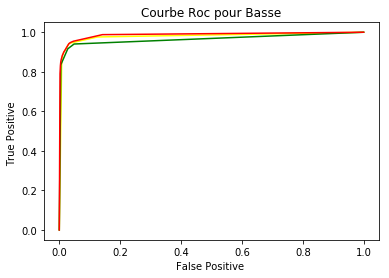

In [30]:
preds_tree = proba_tree[:,0]
preds_knn  = proba_knn[:,0]
preds_Rf   = proba_Rf[:,0]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds_knn, pos_label='Basse')
fprr, tprr, threshold = metrics.roc_curve(y_test, preds_tree, pos_label='Basse')
fprrr, tprrr, threshold = metrics.roc_curve(y_test, preds_Rf, pos_label='Basse')
import matplotlib.pyplot as plt
plt.title('Courbe Roc pour Basse')
plt.plot(fprr,tprr ,color='yellow')
plt.plot(fpr,tpr,color='green')
plt.plot(fprrr,tprrr, color='red')
plt.ylabel('True Positive ')
plt.xlabel('False Positive ')
plt.show()

## Partie 2 : CRO_Qte < 0 (Prédiction du Montant Brut de l'opération)

In [31]:
op_vente=Cro_crod[Cro_crod['CRO_Qte']<0]
op_vente.head()

,CRO_LibOperation,CRO_Qte,CRO_Crs,CRO_MntBrutDevDep,ESO_CodType
26844,5,-100.0,26.6998,2669.98,0
26845,5,-100.0,26.8350,2683.50,0
26846,5,-100.0,26.7800,2678.00,0
26850,5,-350.0,26.8200,9387.00,0
26851,5,-100.0,26.8150,2681.50,0


#### Discrétisation de la colonne CRO_MntBrutDevDep en 4 classes : Basse, Moyenne, Élevée, Très Élevée 

In [32]:
op_vente.describe()

,CRO_LibOperation,CRO_Qte,CRO_Crs,CRO_MntBrutDevDep,ESO_CodType
count,1.774345e+06,1.774345e+06,1.774345e+06,1.774345e+06,1.774345e+06
mean,6.262835e+01,-2.130952e+05,3.803786e+04,3.238420e+06,8.156306e-02
std,2.140196e+01,2.497576e+08,3.020235e+07,2.968002e+09,3.955298e-01
min,2.000000e+00,-3.320488e+11,-1.279358e+04,-4.582500e+06,0.000000e+00
25%,6.600000e+01,-2.230000e+02,8.820000e+00,2.950000e+01,0.000000e+00
50%,6.600000e+01,-7.000000e+01,4.656000e+01,2.254400e+03,0.000000e+00
75%,7.700000e+01,-1.800000e+01,1.446300e+02,6.000250e+03,0.000000e+00
max,7.800000e+01,-7.000000e-06,3.400000e+10,3.400000e+12,2.000000e+00


In [33]:
op_vente["CRO_MntBrutEncodé"]=op_vente["CRO_MntBrutDevDep"]
pd.to_numeric(op_vente["CRO_MntBrutDevDep"])
op_vente.loc[op_vente['CRO_MntBrutDevDep'] >= 6.000250e+03, 'CRO_MntBrutEncodé'] = "Très Elevée"
op_vente.loc[op_vente['CRO_MntBrutDevDep'] < 2.950000e+01, 'CRO_MntBrutEncodé'] = "Basse"
op_vente.loc[(op_vente['CRO_MntBrutDevDep'] >= 2.254400e+03)&(op_vente['CRO_MntBrutDevDep'] < 6.000250e+03 ), 'CRO_MntBrutEncodé'] = "Elevée"
op_vente.loc[(op_vente['CRO_MntBrutDevDep'] < 2.254400e+03)&(op_vente['CRO_MntBrutDevDep'] >= 2.950000e+01) , 'CRO_MntBrutEncodé'] = "Moyenne"

C:\Users\SL-WASSIM\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\SL-WASSIM\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [34]:
op_vente=op_vente.drop(columns=['CRO_MntBrutDevDep'])

In [35]:
op_vente.head()

,CRO_LibOperation,CRO_Qte,CRO_Crs,ESO_CodType,CRO_MntBrutEncodé
26844,5,-100.0,26.6998,0,Elevée
26845,5,-100.0,26.8350,0,Elevée
26846,5,-100.0,26.7800,0,Elevée
26850,5,-350.0,26.8200,0,Très Elevée
26851,5,-100.0,26.8150,0,Elevée


### Maaraftech nsammeha

In [36]:
X_vente=op_vente.iloc[:,:-1].values
y_vente=op_vente.iloc[:,-1]

In [37]:
from sklearn.model_selection import train_test_split
X_train_vente, X_test_vente, y_train_vente, y_test_vente = train_test_split(X_vente, y_vente, random_state=0)

### Arbre de décision 

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model_vente = DecisionTreeClassifier().fit(X_train_vente, y_train_vente)
y_pred_vente_dtc = dtc_model_vente.predict(X_test_vente)

In [39]:
print(accuracy_score(y_test_vente, y_pred_vente_dtc))
print(confusion_matrix(y_test_vente, y_pred_vente_dtc))
print(classification_report(y_test_vente, y_pred_vente_dtc))

0.9836424421815788
[[108964    520    367    717]
 [   164 109123    481   1129]
 [   422    819 109208    606]
 [   377   1054    600 109036]]
              precision    recall  f1-score   support

       Basse       0.99      0.99      0.99    110568
      Elevée       0.98      0.98      0.98    110897
     Moyenne       0.99      0.98      0.99    111055
 Très Elevée       0.98      0.98      0.98    111067

   micro avg       0.98      0.98      0.98    443587
   macro avg       0.98      0.98      0.98    443587
weighted avg       0.98      0.98      0.98    443587



### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_model_vente = rfc.fit(X_train_vente, y_train_vente)
y_pred_vente_rfc = rfc_model_vente.predict(X_test_vente)

C:\Users\SL-WASSIM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [41]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(accuracy_score(y_test_vente,y_pred_vente_rfc))
print(confusion_matrix(y_test_vente, y_pred_vente_rfc))
print(classification_report(y_test_vente, y_pred_vente_rfc))

0.9849927973542958
[[109099    469    315    685]
 [   139 109322    400   1036]
 [   403    825 109255    572]
 [   374    902    537 109254]]
              precision    recall  f1-score   support

       Basse       0.99      0.99      0.99    110568
      Elevée       0.98      0.99      0.98    110897
     Moyenne       0.99      0.98      0.99    111055
 Très Elevée       0.98      0.98      0.98    111067

   micro avg       0.98      0.98      0.98    443587
   macro avg       0.99      0.98      0.99    443587
weighted avg       0.99      0.98      0.98    443587



### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
knn = KNeighborsClassifier(3)#si on veut utiliser la distance manhattan donc:metric='manhattan'
knn_model_vente = knn.fit(X_train_vente, y_train_vente)
y_pred_vente_knn = knn_model_vente.predict(X_test_vente)

In [43]:
print(accuracy_score(y_test_vente,y_pred_vente_knn))
print(confusion_matrix(y_test_vente, y_pred_vente_knn))
print(classification_report(y_test_vente, y_pred_vente_knn))

0.9661644728091671
[[106657    543    893   2475]
 [   559 107478   1446   1414]
 [  1101   1384 107848    722]
 [  1964   1791    717 106595]]
              precision    recall  f1-score   support

       Basse       0.97      0.96      0.97    110568
      Elevée       0.97      0.97      0.97    110897
     Moyenne       0.97      0.97      0.97    111055
 Très Elevée       0.96      0.96      0.96    111067

   micro avg       0.97      0.97      0.97    443587
   macro avg       0.97      0.97      0.97    443587
weighted avg       0.97      0.97      0.97    443587



### COURBE ROC

In [44]:
proba_tree_vente = dtc_model_vente.predict_proba(X_test_vente)
proba_knn_vente  = knn_model_vente.predict_proba(X_test_vente)
proba_Rf_vente  = rfc_model_vente.predict_proba(X_test_vente)

In [ ]:
from sklearn import metrics

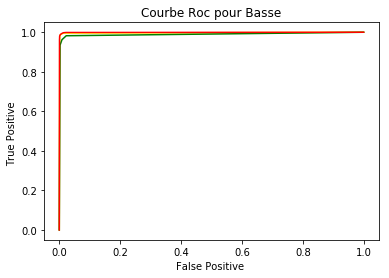

In [46]:
preds_tree_vente = proba_tree_vente[:,0]
preds_knn_vente  = proba_knn_vente[:,0]
preds_Rf_vente   = proba_Rf_vente[:,0]
fpr_v, tpr_v, threshold_v = metrics.roc_curve(y_test_vente, preds_knn_vente, pos_label='Basse')
fprr_v, tprr_v, threshold_v = metrics.roc_curve(y_test_vente, preds_tree_vente, pos_label='Basse')
fprrr_v, tprrr_v, threshold = metrics.roc_curve(y_test_vente, preds_Rf_vente, pos_label='Basse')
import matplotlib.pyplot as plt
plt.title('Courbe Roc pour Basse')
plt.plot(fprr_v,tprr_v ,color='yellow')
plt.plot(fpr_v,tpr_v,color='green')
plt.plot(fprrr_v,tprrr_v, color='red')
plt.ylabel('True Positive ')
plt.xlabel('False Positive ')
plt.show()